# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

os.chdir('C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/DonorsChoose')

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

### Preprocessing Project Grade Category Feature

In [5]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)

In [6]:
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [7]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [8]:
project_data["project_grade_category"] = project_grade_category

In [9]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

  project_grade_category  
0          Grades_PreK-2  
1             Grades_6-8  
2             Grades_6-8  
3          Grades_PreK-2  
4          Grades_PreK-2

## 1.2 preprocessing of `project_subject_categories`

In [10]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [11]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text Preprocessing

## Finding number of words in title and introducing it in a new column
- This can be used as Numerical Feature for Vectorisation

In [12]:
title_word_count = []
for a in project_data["project_title"] :
    b = len(a.split())
    title_word_count.append(b)

In [13]:
project_data["title_word_count"] = title_word_count
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

  project_grade_category                clean_categories  \
0          Grades_PreK-2               Literacy_Language   
1             Grades_6-8    History_Civics Health_Sports   
2             Grades_6-8                   Health_Sports   
3          Grades_PreK-2  Literacy_Language Math_Science   
4          Grades_PreK-2                    Math_Science   

            clean_subcategories  title_word_count  
0                  ESL Literacy                 7  
1  Civics_Government TeamSports                 5  
2    Health_Wellness TeamSports                 7  
3          Literacy Mathematics                 2  
4                   Mathematics                 3

### Combining 4 Project essays into 1 Essay feature 

In [14]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

## Finding number of words in essay and introducing it in a new column
- This can be used as Numerical Feature for Vectorisation

In [15]:
essay_word_count = []
for ess in project_data["essay"] :
    c = len(ess.split())
    essay_word_count.append(c)

In [16]:
project_data["essay_word_count"] = essay_word_count
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

  project_grade_category                clean_categories  \
0          Grades_PreK-2               Literacy_Language   
1             Grades_6-8    History_Civics Health_Sports   
2             Grades_6-8                   Health_Sports   
3          Grades_PreK-2  Literacy_Language Math_Science   
4          Grades_PreK-2                    Math_Science   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   
2    Health_Wellness TeamSports                 7   
3          Literacy Mathematics                 2   
4                   Mathematics                 3   

                                               essay  essay_word_count  
0  My students are English learners that are work...               272  
1  Our students arrive to our school eager to lea...               221  
2  \r\n\"True champions aren't always the ones th...               361  
3  I work at a unique school filled with both ESL...               213  
4  Our second grade classroom next year will be m...               234

 ## Splitting Project_Data into Train and Test Datasets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

### We don't need the 'project_is_approved' feature now

In [18]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

### Printing some random essays

In [19]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [20]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [21]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [22]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [23]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [24]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### Preprocessed Training data (Essay Feature)

In [25]:
# Combining all the above

from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentence in tqdm(X_train['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████████████████████████████| 49041/49041 [00:40<00:00, 1221.56it/s]


In [26]:
# after preprocesing
preprocessed_essays_train[1000]

'students come low income families even first generation americans hungry learn explore new adventures classroom make priority create positive inviting nurturing learning environment classroom students tools need successful educational endeavors invite students family friends collaborate reinforce daily routines academic targets positive home school connection ensure success students students need seat pockets order learning tools easily accessible times rather bulky basket middle tables would simply take away precious learning space seat pocket allows students keep supplies neat personal area students lack many things truly appreciate designated space belongings pockets introduce independence responsibility accountability self regulation no precious learning time wasted getting grab materials pass notebooks students learn become independent thinkers quick access individual reference sheets stored pockets nannan'

### Preprocessed Test data (Essay Feature)

In [27]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentence in tqdm(X_test['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████████████████████████████| 36052/36052 [00:29<00:00, 1230.04it/s]


In [28]:
# after preprocesing
preprocessed_essays_test[1000]

'students year creative driven interested topics learning want see applies lives either future given spark need help guide reach full potential kids interested learning helping others know right ideas materials creativity drive make difference whether big small students need knives currently using steak knives cut vegetables really unsafe not help learn appropriate safe knife skills needed imagine cutting vegetable press hard weight vegetable cutting board slip nip finger reality nutrition nutrition science class teach knife safety hard follow using old steak knives cut foods nerve racking watching teens cutting knowing not safe need new knives able safely cut foods give piece mind nannan'

### Preprocessed Cross Validation data (Essay Feature)

In [29]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████████████████████████████| 24155/24155 [00:20<00:00, 1201.84it/s]


In [30]:
# after preprocesing
preprocessed_essays_cv[1000]

'would describe classroom well tricky classroom actually involves 3 different grades 5 different instructional levels 2 different subjects day despite differences students common group awesome special education students middle school students receive special education services learning support classroom well co teaching environment wide range disabilities talents needs supports struggle communicate ideas feelings school work others great speakers expressing thoughts comes easily struggle writing need much support put words paper others find writing enjoyable task require number lines counters perform basic math computations others getting ready algebra lastly reading grade level novels independently others need hear texts read aloud order comprehend wide range student needs service often pulled multiple directions need use tools chrome books center supplies make sure students successful cannot assist students assignments use computers type work dictate thoughts program type struggling 

### Preprocessing Training data(Titles Feature)

In [31]:
preprocessed_titles_train = []

for titles in tqdm(X_train["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_train.append(title.lower().strip())

100%|█████████████████████████████████| 49041/49041 [00:01<00:00, 28100.03it/s]


In [32]:
preprocessed_titles_train[1000]

'accessing learning tools via seat pockets'

### Preprocessing Test data(Titles Feature)

In [33]:
preprocessed_titles_test = []

for titles in tqdm(X_test["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_test.append(title.lower().strip())

100%|█████████████████████████████████| 36052/36052 [00:01<00:00, 26489.77it/s]


In [34]:
preprocessed_titles_test[1000]

'ouch dull knives are unsafe'

### Preprocessing Cross Validation data(Titles Feature)

In [35]:
preprocessed_titles_cv = []

for titles in tqdm(X_cv["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_cv.append(title.lower().strip())

100%|█████████████████████████████████| 24155/24155 [00:00<00:00, 26879.60it/s]


In [36]:
preprocessed_titles_cv[1000]

'chrome holidays'

## 1.10 Preparing data for models

In [37]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'clean_categories', 'clean_subcategories',
       'title_word_count', 'essay', 'essay_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical
       - title_word_count : numerical
       - essay_word_count : numerical

## 1.11 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

## One Hot Encoding - (Clean Categories Feature)

In [38]:
# we use count vectorizer to convert the values into one 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_proj = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_proj.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)

print(vectorizer_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (49041, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (24155, 9)


## One Hot Encoding - (Clean Sub-Categories Feature)

In [39]:
# we use count vectorizer to convert the values into one 

vectorizer_sub_proj = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)


print(vectorizer_sub_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (49041, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 30)


## One Hot Encoding - (School States Feature)

In [40]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [41]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [42]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_states = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_states.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer_states.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer_states.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer_states.transform(X_cv['school_state'].values)

print(vectorizer_states.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix of Train data after one hot encoding  (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 51)


## One Hot Encoding - (Project Grade Category Feature)

In [43]:
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [44]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [45]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']
Shape of matrix of Train data after one hot encoding  (49041, 4)
Shape of matrix of Test data after one hot encoding  (36052, 4)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 4)


## One Hot Encoding - (Teacher Prefix Feature)

In [46]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna("")

In [47]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [48]:
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [49]:
## we use count vectorizer to convert the values into one hot encoded features
## Unlike the previous Categories this category returns a
## ValueError: np.nan is an invalid document, expected byte or unicode string.
## The link below explains h0w to tackle such discrepancies.
## https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809#39308809

vectorizer_teacher = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_teacher.fit(X_train['teacher_prefix'].values.astype('U'))



teacher_prefix_categories_one_hot_train = vectorizer_teacher.transform(X_train['teacher_prefix'].values.astype('U'))
teacher_prefix_categories_one_hot_test = vectorizer_teacher.transform(X_test['teacher_prefix'].values.astype('U'))
teacher_prefix_categories_one_hot_cv = vectorizer_teacher.transform(X_cv['teacher_prefix'].values.astype('U'))

print(vectorizer_teacher.get_feature_names())

print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encoding  (49041, 5)
Shape of matrix after one hot encoding  (36052, 5)
Shape of matrix after one hot encoding  (24155, 5)


## 1.12 Vectorizing Text data

### Bag of words - Training Data (Essays Feature)

In [50]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit(preprocessed_essays_train)
text_bow_train = vectorizer_bow_essay.transform(preprocessed_essays_train)
print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (49041, 12067)


### Bag of words - Test Data (Essays Feature)

In [51]:
text_bow_test = vectorizer_bow_essay.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 12067)


### Bag of words - Cross Validation Data ( Essays Feature)

In [52]:
text_bow_cv = vectorizer_bow_essay.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 12067)


### Bag of words - Train Data - (Titles Feature)

In [53]:
vectorizer_bow_title = CountVectorizer(min_df=10)

vectorizer_bow_title.fit(preprocessed_titles_train)

title_bow_train = vectorizer_bow_title.transform(preprocessed_titles_train)
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (49041, 2084)


### Bag of words - Test Data - (Titles Feature)

In [54]:
title_bow_test = vectorizer_bow_title.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 2084)


### Bag of words - Cross Validation Data -(Titles Feature)

In [55]:
title_bow_cv = vectorizer_bow_title.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 2084)


### TFIDF - Training Data - (Essays Feature)


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(preprocessed_essays_train)
text_tfidf_train = vectorizer_tfidf_essay.transform(preprocessed_essays_train)
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (49041, 12067)


### TFIDF - Test Data -(Essays Feature)

In [57]:
text_tfidf_test = vectorizer_tfidf_essay.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 12067)


### TFIDF - Cross Validation Data - (Essays Feature)

In [58]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (24155, 12067)


### TFIDF - Train Data - (Titles Feature)

In [59]:
vectorizer_tfidf_titles = TfidfVectorizer(min_df=10)

vectorizer_tfidf_titles.fit(preprocessed_titles_train)
title_tfidf_train = vectorizer_tfidf_titles.transform(preprocessed_titles_train)
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (49041, 2084)


### TFIDF - Test Data - (Titles Feature)

In [60]:
title_tfidf_test = vectorizer_tfidf_titles.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 2084)


### TFIDF - Cross Validation Data - (Titles Feature)

In [61]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (24155, 2084)


## Using Pretrained Models: Avg W2V

In [62]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [63]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### Avg_W2V for Train Data(Essays feature)

In [64]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████████████████████████████| 49041/49041 [00:20<00:00, 2368.13it/s]


49041
300


### Avg_W2V for Test Data(Essays feature)

In [65]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████████████████████████████| 36052/36052 [00:15<00:00, 2369.48it/s]


36052
300


### Avg_W2V for Cross Validation Data(Essays feature)

In [66]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████████████████████████████| 24155/24155 [00:10<00:00, 2356.29it/s]


24155
300


### Avg_W2V for Train Data(Titles feature)

In [67]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████| 49041/49041 [00:01<00:00, 39236.31it/s]


49041
300


### Avg_W2V for Test Data(Titles feature)

In [68]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|█████████████████████████████████| 36052/36052 [00:00<00:00, 41842.58it/s]


36052
300


### Avg_W2V for Cross Validation Data(Titles feature)

In [69]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|█████████████████████████████████| 24155/24155 [00:00<00:00, 34286.64it/s]


24155
300


### TFIDF weighted W2V for Train Data(Essays feature)

In [70]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [71]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████| 49041/49041 [02:16<00:00, 360.59it/s]


49041
300


### TFIDF weighted W2V for Test Data(Essays feature)

In [72]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [73]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████| 36052/36052 [01:40<00:00, 357.12it/s]


36052
300


### TFIDF weighted W2V for Cross Validation Data(Essays feature)

In [74]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_cv)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [75]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|███████████████████████████████████| 24155/24155 [01:04<00:00, 375.44it/s]


24155
300


### TFIDF weighted W2V for Train Data(Titles feature)

In [76]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [77]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████| 49041/49041 [00:02<00:00, 18759.60it/s]


49041
300


### TFIDF weighted W2V for Test Data(Titles feature)

In [78]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [79]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|█████████████████████████████████| 36052/36052 [00:01<00:00, 18676.20it/s]


36052
300


### TFIDF weighted W2V for Cross Validation Data(Titles feature)

In [80]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_cv)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [81]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|█████████████████████████████████| 24155/24155 [00:01<00:00, 18961.41it/s]


24155
300


## Vectorizing Numerical features

__Normalise Numerical values instead of Standardising else it give Error that 'Negative Values not allowed'__
- Normalising it will bound the data to 0 and 1

### Price Feature

In [82]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [83]:
#Now join Price data to Train,Test and Cross Validation Data
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [84]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Quantity Feature

In [85]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Number of Projects previously proposed by Teacher Feature

In [86]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


###  Title word Count Feature

In [87]:
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Essay word Count

In [88]:
normalizer_ess_count = Normalizer()

normalizer_ess_count.fit(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_train = normalizer_ess_count.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer_ess_count.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer_ess_count.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# Apply Decision Trees

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Trees </h1>

## Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)

In [89]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()

In [90]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 14184) (49041,)
(24155, 14184) (24155,)
(36052, 14184) (36052,)


## RandomisedSearchCV Implementation (Decision Tree) 

In [91]:
import scipy.stats as sc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {   "min_samples_split":[5,10,100,500],
             "max_depth":[1, 5, 10, 50, 100, 500, 100],
         }

grid = RandomizedSearchCV(DecisionTreeClassifier(), params, cv = 3, scoring = 'roc_auc', verbose = 1, random_state = 0,n_jobs = -1)
grid.fit(X_tr,y_train)
print(grid.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.6min finished


{'min_samples_split': 500, 'max_depth': 10}


__Summary__
-  Decision Tree with maximum depth 10, performs decently on both Train as well as Cross Validation Data.
-  Minimum samples per split is 500.

## 3D Scatter Plots

In [96]:
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

In [97]:
train_auc

array([0.5424443 , 0.976037  , 0.84287581, 0.94684114, 0.61794365,
       0.65137741, 0.94851349, 0.87201361, 0.99852705, 0.94479137])

In [98]:
cv_auc

array([0.53881636, 0.53400262, 0.54757949, 0.50543813, 0.59845878,
       0.60866791, 0.49900696, 0.5255656 , 0.52179704, 0.50371343])

In [89]:
import plotly
plotly.tools.set_credentials_file(username='Subham27091995', api_key='K1wGeAeNfKl8T8Wx1bHl')

In [90]:
x1 = [0.5424443 , 0.976037  , 0.84287581, 0.94684114, 0.61794365,
       0.65137741, 0.94851349, 0.87201361, 0.99852705, 0.94479137]

In [91]:
x2= [0.53881636, 0.53400262, 0.54757949, 0.50543813, 0.59845878,
       0.60866791, 0.49900696, 0.5255656 , 0.52179704, 0.50371343]

In [92]:
z1 = pd.Series([1,5,10,10,50,50,100,100,500,500],index = x1)

In [93]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10], index = x1)

In [94]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [95]:
data = [trace1, trace2]

In [96]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- BoW Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [97]:
import plotly.plotly as py

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-a', height=700)

## B) Train the model using the best hyper parameter value

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

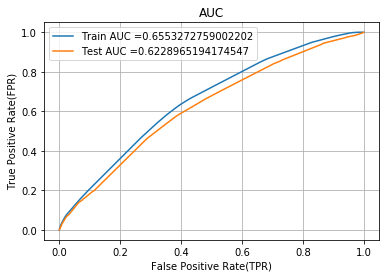

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion Matrix

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24661578766678885 for threshold 0.839
[[ 3281  4145]
 [10162 31453]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24661578766678885 for threshold 0.839


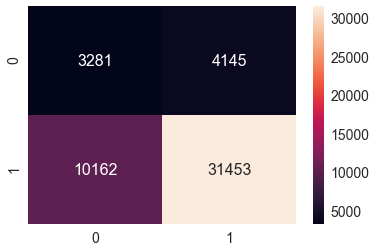

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24272868126738445 for threshold 0.839
[[ 2264  3195]
 [ 7688 22905]]


In [0]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24272868126738445 for threshold 0.839


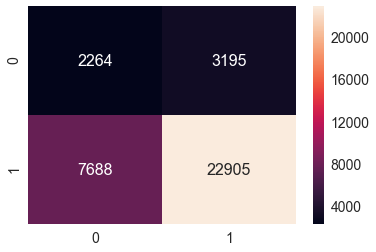

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

## False Positives from BoW Essay feature

In [0]:
bow_test = text_bow_test.todense()

In [0]:
bow_test.shape

In [0]:
vectorizer_bow_essay = CountVectorizer(min_df=10)

av = vectorizer_bow_essay.fit(X_train["clean_essays"])

In [0]:
bow_features = av.get_feature_names()

In [0]:
len(bow_features)

620

In [ ]:
y_test_converted = list(y_test[::])

In [0]:
false_positives_index_a = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.839:
        false_positives_index_a.append(i)
        fp_count = fp_count + 1 
    else :
        continue

100%|██████████| 36052/36052 [00:00<00:00, 1732306.65it/s]


In [0]:
fp_count

2893

In [0]:
false_positives_index_a[0:5]

[8, 19, 21, 34, 38]

In [0]:
df1 = pd.DataFrame(bow_test)

In [0]:
df1_final = df1.iloc[false_positives_index_a,:]

In [0]:
df1_final.shape

(2893, 14239)

In [0]:
df1_final[0].sum()

In [0]:
best_indices = []

for j in range(12068):
    
    s = df1_final[j].sum()
    
    if s >= 100 :
        best_indices.append(j)
    else :
        continue
        

In [0]:
len(best_indices)

720

In [0]:
best_indices[0:10]

[2, 3, 4, 5, 6, 7, 8, 27, 28, 29]

In [0]:
bow_features[0:10]

['00', '000', '10', '100', '1000', '100th', '101', '102', '103', '105']

In [ ]:
fp_words = []

for a in best_indices :
    fp_words.append(str(bow_features[a]))

In [ ]:
fp_words[0:10]

## Word Cloud

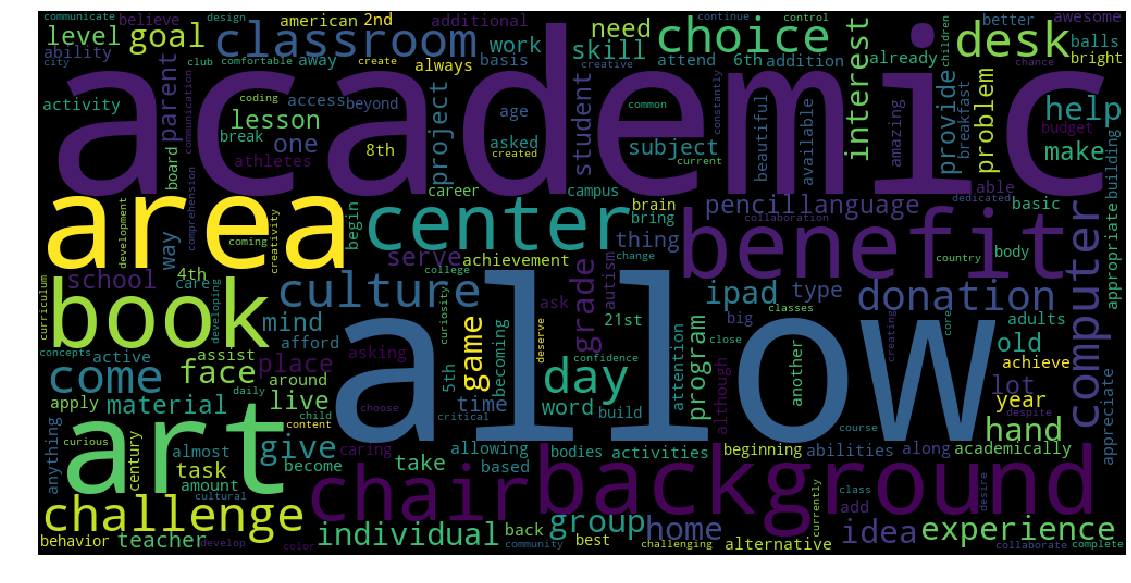

In [0]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Visualize Decision Trees

In [94]:
bow_features_names = []

## Obtain Feature names for Project titles
for a in vectorizer_proj.get_feature_names() :
    bow_features_names.append(a)
## Obtain Feature names for Project Sub-titles
for a in vectorizer_sub_proj.get_feature_names() :
    bow_features_names.append(a)
## Obtain Feature names for states 
for a in vectorizer_states.get_feature_names() :
    bow_features_names.append(a)
## Obtain Feature names for Project Grade Category
for a in vectorizer_grade.get_feature_names() :
    bow_features_names.append(a)
## Obtain Feature names for Teacher Title
for a in vectorizer_teacher.get_feature_names() :
    bow_features_names.append(a)

In [95]:
len(bow_features_names)

99

In [96]:
bow_features_names.append("price")
bow_features_names.append("quantity")
bow_features_names.append("prev_proposed_projects")
bow_features_names.append("title_word_count")
bow_features_names.append("essay_word_count")

In [97]:
for a in vectorizer_bow_title.get_feature_names() :
    bow_features_names.append(a)
for a in vectorizer_bow_essay.get_feature_names() :
    bow_features_names.append(a)

In [98]:
len(bow_features_names)

14226

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_tr, y_train)

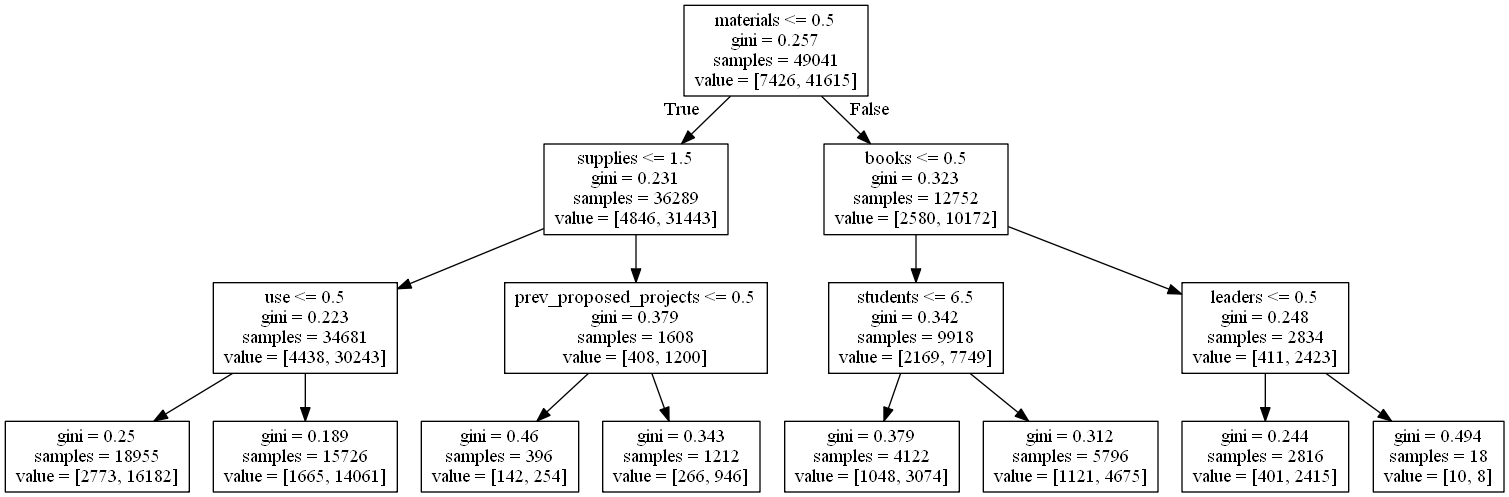

In [101]:
# Importing libraries
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import os
## os.chdir("C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/DonorsChoose/bin")
os.environ["PATH"] += os.pathsep + 'C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/DonorsChoose/bin'
target = ['0','1']
# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=bow_features_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph = Source(data)

# Show graph
Image(graph.create_png())
#display(SVG(graph.pipe(format='svg')))

### F) Box - Plot with the price of these False positive data points

In [0]:
p = pd.DataFrame(X_test['price'])

In [0]:
price_final = p.iloc[false_positives_index_a,:]

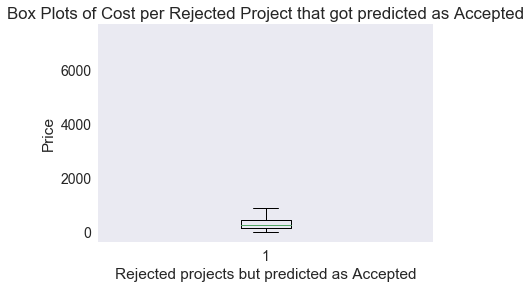

In [0]:
plt.boxplot(price_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

### G) PDF with the Teacher_number_of_previously_posted_projects of these False Positive data points

In [0]:
ppt = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [0]:
ppt_final = ppt.iloc[false_positives_index_a,:]

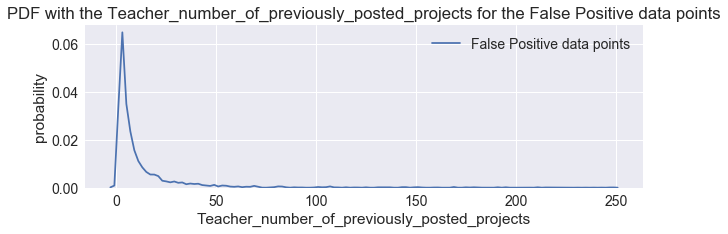

In [0]:
plt.figure(figsize=(10,3))
sns.distplot(ppt_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

__Summary__
- Majority of the cases have Teachers with previously posted projects as 0 (which is nearly 10% of the total data)

## Set 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)

In [118]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [119]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 14184) (49041,)
(24155, 14184) (24155,)
(36052, 14184) (36052,)


## RandomisedSearchCV Implementation (Decision Tree) 

In [120]:
import scipy.stats as sc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {   "min_samples_split":[5,10,100,500],
             "max_depth":[1, 5, 10, 50, 100, 500, 100],
         }

grid = RandomizedSearchCV(DecisionTreeClassifier(), params, cv = 3, scoring = 'roc_auc', verbose = 1, random_state = 0,n_jobs = -1)
grid.fit(X_tr,y_train)
print(grid.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.5min finished


{'min_samples_split': 500, 'max_depth': 10}


__Summary__
-  Decision Tree with maximum depth 10, performs decently on both Train as well as Cross Validation Data.
-  Minimum samples per split is 500.

## 3D Scatter Plots

In [121]:
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

In [122]:
train_auc

array([0.54882526, 0.97820774, 0.82563687, 0.93047811, 0.61229564,
       0.64940382, 0.93378494, 0.85592746, 0.9992774 , 0.93258899])

In [123]:
cv_auc

array([0.54812406, 0.54461966, 0.55024122, 0.5115032 , 0.59540348,
       0.60574464, 0.50758831, 0.53225382, 0.53361451, 0.5150171 ])

In [98]:
x1=[0.54882526, 0.97820774, 0.82563687, 0.93047811, 0.61229564,
       0.64940382, 0.93378494, 0.85592746, 0.9992774 , 0.93258899]

In [99]:
x2=[0.54812406, 0.54461966, 0.55024122, 0.5115032 , 0.59540348,
       0.60574464, 0.50758831, 0.53225382, 0.53361451, 0.5150171 ]

In [100]:
z1 = pd.Series([1,5,10,10,50,50,100,100,500,500],index = x1)

In [101]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10], index = x1)

In [104]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [105]:
data = [trace1, trace2]

In [106]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TFIDF Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [107]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-a', height=700)

## B) Train the model using the best hyper parameter value

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

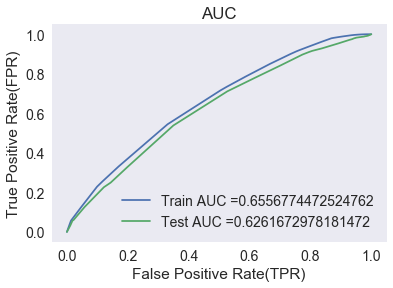

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion Matrix

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24997778602908424 for threshold 0.847
[[ 3678  3748]
 [11813 29802]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24997778602908424 for threshold 0.847


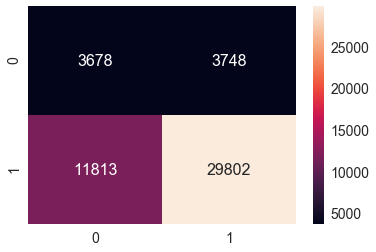

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24926994118020324 for threshold 0.847
[[ 2582  2877]
 [ 8836 21757]]


In [0]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24926994118020324 for threshold 0.847


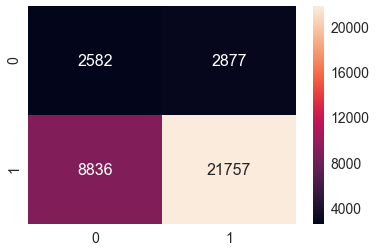

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

## Visualise Decision Trees

In [104]:
tfidf_features_names = []

In [105]:
## Obtain Feature names for Project titles
for a in vectorizer_proj.get_feature_names() :
    tfidf_features_names.append(a)
## Obtain Feature names for Project Sub-titles
for a in vectorizer_sub_proj.get_feature_names() :
    tfidf_features_names.append(a)
## Obtain Feature names for states 
for a in vectorizer_states.get_feature_names() :
    tfidf_features_names.append(a)
## Obtain Feature names for Project Grade Category
for a in vectorizer_grade.get_feature_names() :
    tfidf_features_names.append(a)
## Obtain Feature names for Teacher Title
for a in vectorizer_teacher.get_feature_names() :
    tfidf_features_names.append(a)

In [106]:
tfidf_features_names.append("price")
tfidf_features_names.append("quantity")
tfidf_features_names.append("prev_proposed_projects")
tfidf_features_names.append("title_word_count")
tfidf_features_names.append("essay_word_count")

In [107]:
for a in vectorizer_tfidf_titles.get_feature_names() :
    tfidf_features_names.append(a)
for a in vectorizer_tfidf_essay.get_feature_names() :
    tfidf_features_names.append(a)

In [108]:
len(tfidf_features_names)

14226

In [109]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_tr, y_train)

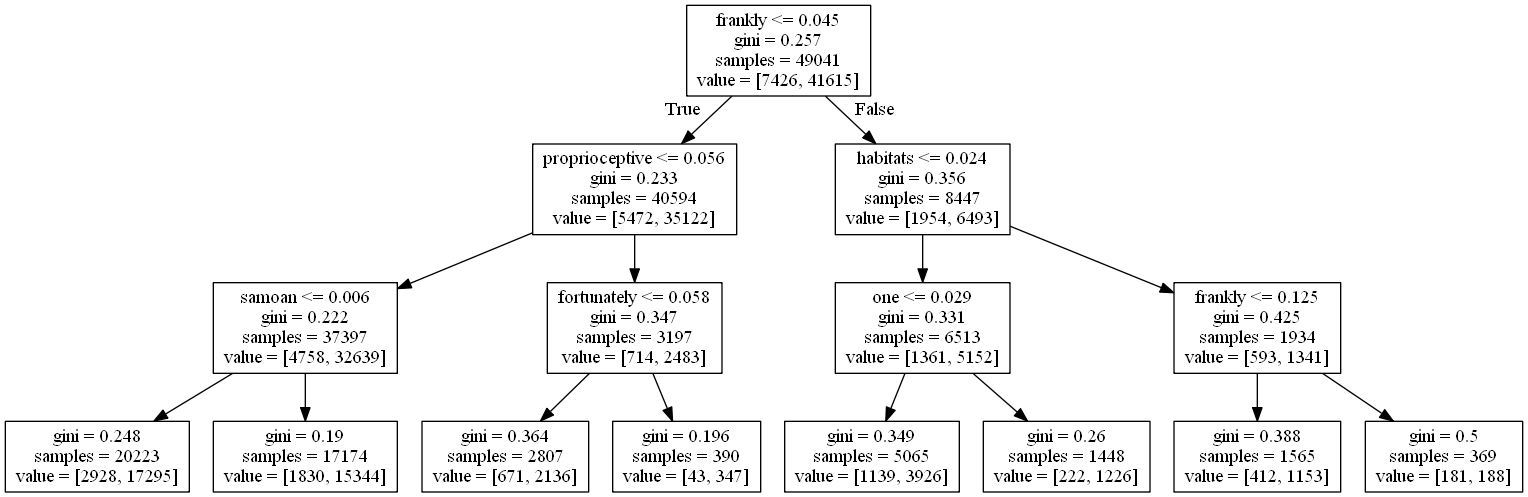

In [110]:
# Importing libraries
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import os
## os.chdir("C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/DonorsChoose/bin")
os.environ["PATH"] += os.pathsep + 'C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/DonorsChoose/bin'
target = ['0','1']
# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=tfidf_features_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph = Source(data)

# Show graph
Image(graph.create_png())
#display(SVG(graph.pipe(format='svg')))

## Find all the FALSE POSITIVES to see what is wrong with the model and plotting WORDCLOUD

In [0]:
tfidf_test = text_tfidf_test.todense()

In [0]:
tfidf_test.shape

(36052, 12056)

In [0]:
vectorizer_tfidf_essay = CountVectorizer(min_df=10)

bv = vectorizer_tfidf_essay.fit(preprocessed_essays_train)

In [0]:
tfidf_features = bv.get_feature_names()

In [0]:
len(tfidf_features)

12056

In [0]:
y_test_converted = list(y_test[::])

In [0]:
false_positives_index_b = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.84:
        false_positives_index_b.append(i)
        fp_count = fp_count + 1 
    else :
        continue

100%|█████████████████████████████████| 36052/36052 [00:02<00:00, 17196.91it/s]


In [0]:
fp_count

2747

In [0]:
false_positives_index_b[0:5]

[12, 27, 38, 44, 52]

In [0]:
df2 = pd.DataFrame(tfidf_test)

In [0]:
df2_final = df2.iloc[false_positives_index_b,:]

In [0]:
df2_final.shape

(2747, 12056)

In [0]:
best_indices_b = []

for j in range(12056):
    
    s = df2_final[j].sum()
    
    if s >= 10 :
        best_indices_b.append(j)
    else :
        continue
        

In [0]:
len(best_indices_b)

489

In [0]:
best_indices_b[0:10]

[3, 209, 210, 211, 236, 237, 253, 304, 333, 339]

In [0]:
tfidf_features[0:10]

['00', '000', '10', '100', '1000', '100th', '101', '103', '104', '105']

In [0]:
fp_words_b = []

for a in best_indices_b :
    fp_words_b.append(str(tfidf_features[a]))

In [0]:
fp_words_b[0:10]

['100',
 'abilities',
 'ability',
 'able',
 'academic',
 'academically',
 'access',
 'achieve',
 'active',
 'activities']

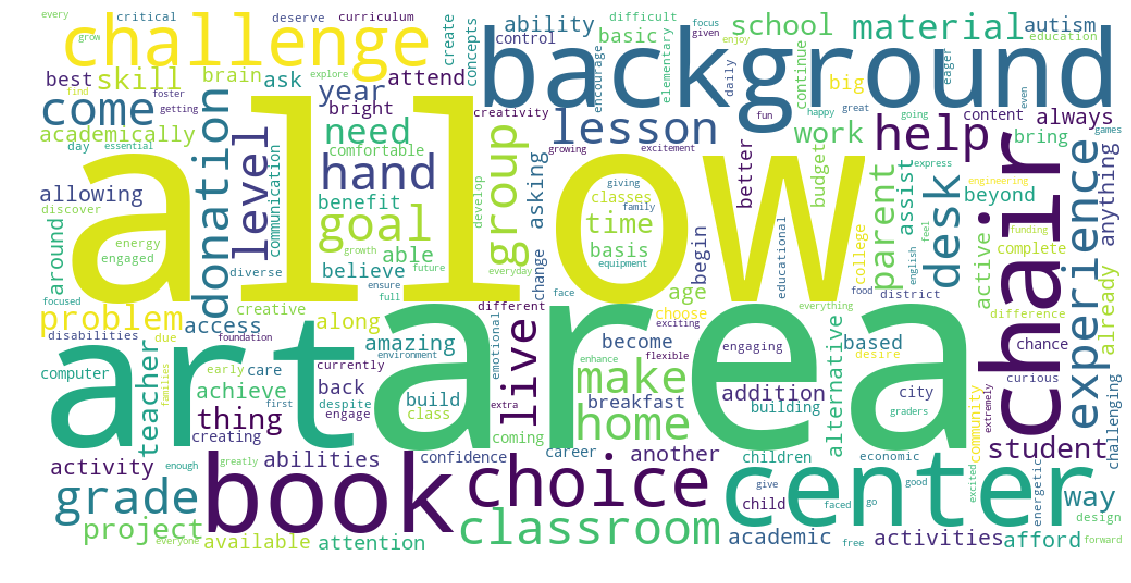

In [0]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(fp_words_b)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

## F) Box - Plot with the price of these False positive data points

In [0]:
p_b = pd.DataFrame(X_test['price'])

In [0]:
price_b_final = p_b.iloc[false_positives_index_b,:]

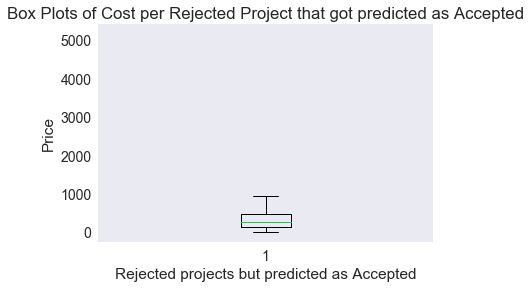

In [0]:
plt.boxplot(price_b_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

## Inference 

### 1) Majority of the projects that were rejected but predicted as accepted Costs almost less than 500 Dollars.

### 2) Good number of incorrectly prediced projects cost around 1000 - 2000 Dollars.

### 3) A Few of them are Extremely costly costing more than 2000 Dollars.

## G) PDF with the Teacher_number_of_previously_posted_projects of these False Positive data points

In [0]:
ppt_b = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [0]:
ppt_b_final = ppt_b.iloc[false_positives_index_b,:]

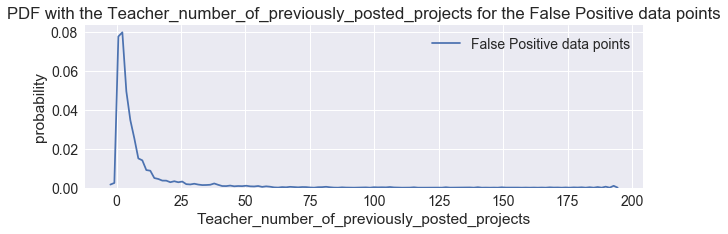

In [0]:
plt.figure(figsize=(10,3))
sns.distplot(ppt_b_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

## Inference 

### 1) Majority of the cases have Teachers with previously posted projects as 0.

### 2) Good percent of Teachers have 10 or fewer projects previously posted projects.

## Set 3 : Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V)

In [138]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train,  price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test,  price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [139]:
print("Final Avg W2V Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Avg W2V Data matrix
(49041, 704) (49041,)
(24155, 704) (24155,)
(36052, 704) (36052,)


## RandomisedSearchCV Implementation (Decision Tree) 

In [140]:
import scipy.stats as sc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {   "min_samples_split":[5,10,100,500],
             "max_depth":[1, 5, 10, 50, 100, 500, 100],
         }

grid = RandomizedSearchCV(DecisionTreeClassifier(), params, cv = 3, scoring = 'roc_auc', verbose = 1, random_state = 0,n_jobs = -1)
grid.fit(X_tr,y_train)
print(grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 36.4min finished


{'min_samples_split': 10, 'max_depth': 5}


__Summary__
-  Decision Tree with maximum depth 5, performs decently on both Train as well as Cross Validation Data.
-  Minimum samples per split is 10.

## 3D Scatter Plots

In [141]:
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

In [142]:
train_auc

array([0.55577735, 0.94601595, 0.93692278, 0.99644721, 0.6399354 ,
       0.69435762, 0.99940186, 0.98896032, 0.99948385, 0.99642459])

In [143]:
cv_auc

array([0.55227055, 0.55225314, 0.53802391, 0.52425717, 0.60377428,
       0.59695575, 0.51871648, 0.49083004, 0.52415175, 0.52530473])

In [108]:
x1=[0.55577735, 0.94601595, 0.93692278, 0.99644721, 0.6399354 ,
       0.69435762, 0.99940186, 0.98896032, 0.99948385, 0.99642459]

In [109]:
x2=[0.55227055, 0.55225314, 0.53802391, 0.52425717, 0.60377428,
       0.59695575, 0.51871648, 0.49083004, 0.52415175, 0.52530473]

In [110]:
z1 = pd.Series([1,5,10,10,50,50,100,100,500,500],index = x1)

In [111]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10], index = x1)

In [112]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [113]:
data = [trace1, trace2]

In [116]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- AVG_W2V Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [117]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-d', height=900)

## B) Train the model using the best hyper parameter value

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

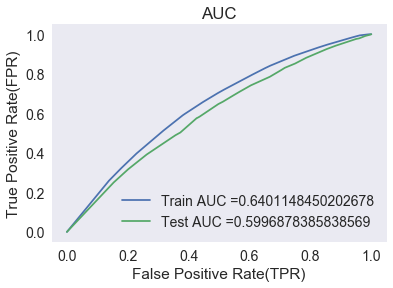

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 10)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion Matrix

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24997903726499707 for threshold 0.838
[[ 3747  3679]
 [12405 29210]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24997903726499707 for threshold 0.838


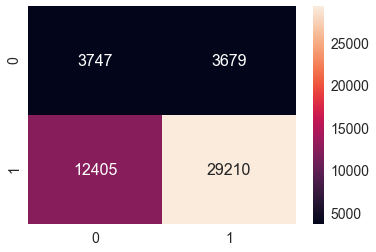

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999388436794448 for threshold 0.849
[[ 2743  2716]
 [10805 19788]]


In [0]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999388436794448 for threshold 0.849


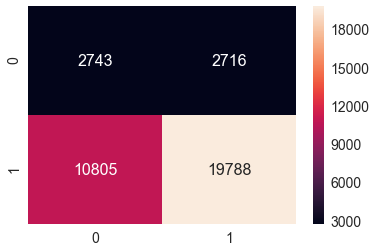

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

## Set 4 : Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [84]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train,  price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test,  price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [85]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 704) (49041,)
(24155, 704) (24155,)
(36052, 704) (36052,)


## RandomisedSearchCV Implementation (Decision Tree) 

In [86]:
import scipy.stats as sc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {   "min_samples_split":[5,10,100,500],
             "max_depth":[1, 5, 10, 50, 100, 500, 100],
         }

grid = RandomizedSearchCV(DecisionTreeClassifier(), params, cv = 3, scoring = 'roc_auc', verbose = 1, random_state = 0,n_jobs = -1)
grid.fit(X_tr,y_train)
print(grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 55.5min finished


{'min_samples_split': 10, 'max_depth': 5}


__Summary__
-  Decision Tree with maximum depth 5, performs decently on both Train as well as Cross Validation Data.
-  Minimum samples per split is 10.

## 3D Scatter Plots

In [87]:
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

In [88]:
train_auc

array([0.56043441, 0.9401793 , 0.93676212, 0.99623801, 0.65211496,
       0.71726926, 0.9995209 , 0.99440639, 0.99953489, 0.99627564])

In [89]:
cv_auc

array([0.55326183, 0.55455891, 0.54620284, 0.52583947, 0.61262427,
       0.60659608, 0.52236008, 0.51025936, 0.52221339, 0.52787058])

In [90]:
import plotly
plotly.tools.set_credentials_file(username='Subham27091995', api_key='UIByfud7j0socJjnGnOI')

In [118]:
x1=[0.56043441, 0.9401793 , 0.93676212, 0.99623801, 0.65211496,
       0.71726926, 0.9995209 , 0.99440639, 0.99953489, 0.99627564]

In [119]:
x2= [0.55326183, 0.55455891, 0.54620284, 0.52583947, 0.61262427,
       0.60659608, 0.52236008, 0.51025936, 0.52221339, 0.52787058]

In [120]:
z1 = pd.Series([1,5,10,10,50,50,100,100,500,500],index = x1)

In [121]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10], index = x1)

In [122]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [124]:
data = [trace1,trace2]

In [125]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TFIDF_w2v Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [126]:
import plotly.plotly as py

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-d', height=900)

## B) Train the model using the best hyper parameter value

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

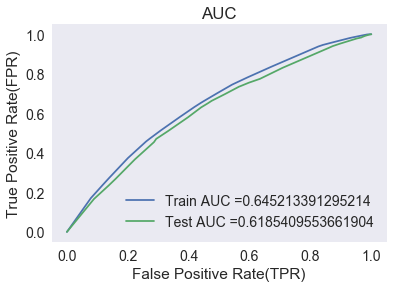

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 10)

model.fit(X_tr_new, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr_new)    
y_test_pred = batch_predict(model, X_te_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion Matrix

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24996801188188134 for threshold 0.835
[[ 3755  3671]
 [12391 29224]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24996801188188134 for threshold 0.835


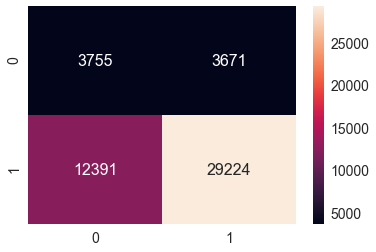

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24966778443754356 for threshold 0.835
[[ 2630  2829]
 [ 9288 21305]]


In [0]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24966778443754356 for threshold 0.835


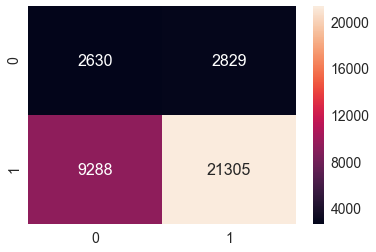

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

## Summary:

1. When data(n) is large and dimension(d) is small , Decision Tree is your choice
1. As depth increases --> OVERFITTING 
    As depth decreases --> UNDERFITTING 

# [Task 2] Select best 5k features from Set 2

In [107]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [108]:
from sklearn.feature_selection import SelectKBest, chi2

X_tr_new = SelectKBest(chi2, k=5000).fit_transform(X_tr, y_train)
X_te_new = SelectKBest(chi2, k=5000).fit_transform(X_te, y_test)
X_cr_new = SelectKBest(chi2, k=5000).fit_transform(X_cr, y_cv)

In [109]:
print("Final Data matrix")
print(X_tr_new.shape, y_train.shape)
print(X_cr_new.shape, y_cv.shape)
print(X_te_new.shape, y_test.shape)

Final Data matrix
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [110]:
import scipy.stats as sc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {   "min_samples_split":[5,10,100,500],
             "max_depth":[1, 5, 10, 50, 100, 500, 100],
         }

grid = RandomizedSearchCV(DecisionTreeClassifier(), params, cv = 3, scoring = 'roc_auc', verbose = 1, random_state = 0,n_jobs = -1)
grid.fit(X_tr_new,y_train)
print(grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.3min finished


{'min_samples_split': 500, 'max_depth': 10}


-  Decision Tree with maximum depth 10, performs decently on both Train as well as Cross Validation Data.
-  Minimum samples per split is 500.

## 3D Scatter Plots


In [111]:
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

In [112]:
train_auc

array([0.55052892, 0.97384492, 0.82055896, 0.93249374, 0.61772317,
       0.65418001, 0.9417974 , 0.8537404 , 0.9989926 , 0.93321118])

In [113]:
cv_auc

array([0.54838288, 0.55591558, 0.54806407, 0.51175939, 0.59945291,
       0.61035643, 0.50457983, 0.52339071, 0.53903286, 0.51007976])

In [127]:
x1=[0.56043441, 0.9401793 , 0.93676212, 0.99623801, 0.65211496,
       0.71726926, 0.9995209 , 0.99440639, 0.99953489, 0.99627564]

In [128]:
x2= [0.54838288, 0.55591558, 0.54806407, 0.51175939, 0.59945291,
       0.61035643, 0.50457983, 0.52339071, 0.53903286, 0.51007976]

In [129]:
z1 = pd.Series([1,5,10,10,50,50,100,100,500,500],index = x1)

In [130]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10], index = x1)

In [131]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [132]:
data = [trace1,trace2]

In [133]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Train Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [134]:
import plotly.plotly as py

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-d', height=900)

## C) Train the model using the best hyper parameter value

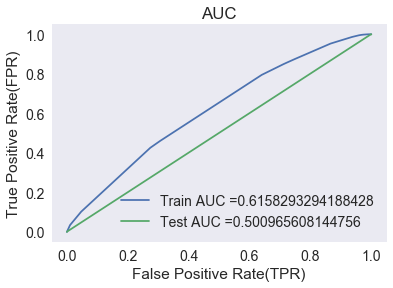

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 10)

model.fit(X_tr_new, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr_new)    
y_test_pred = batch_predict(model, X_te_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Confusion Matrix

### Train Data

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.23034868717063933 for threshold 0.849
[[ 2672  4754]
 [ 8550 33065]]


In [0]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.23034868717063933 for threshold 0.849


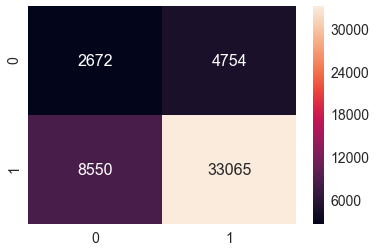

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.0029223493248359124 for threshold 0.912
[[ 5458     1]
 [30572    21]]


In [0]:
conf_matr_df_test_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.0029223493248359124 for threshold 0.912


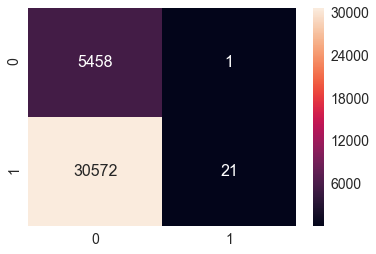

In [0]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_5, annot=True,annot_kws={"size": 16}, fmt='g')

## Utility Functions for Confusion Matrix, Precision Matrix, Recall Matrix 

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## Distribution of Yi's

In [0]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.15142431842743825 Class 1:  0.8485756815725617
---------- Distribution of output variable in train data ----------
Class 0:  0.8485798291356929 Class 1:  0.8485798291356929


## Building a Random Model

Log loss on Test Data using Random Model 0.8879068011160692


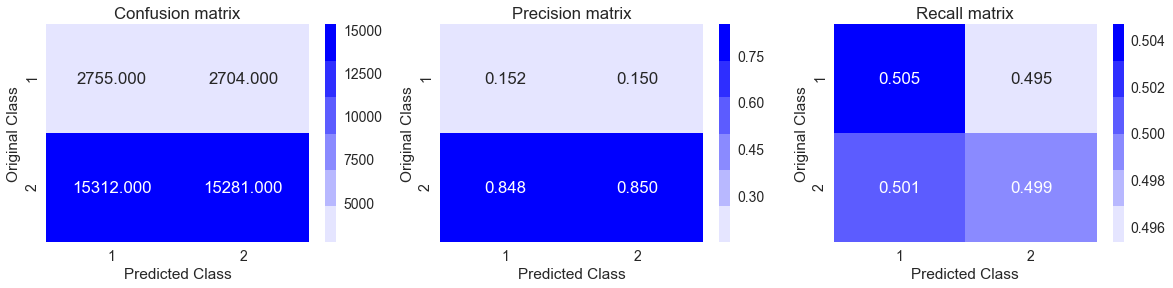

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

### So, we got Test Log-Loss of a Random Model to be 0.887. Any sensible model we build further should have Test Log-Loss considerably less than this.

## Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.3986213731090486
For values of alpha =  0.0001 The log loss is: 0.3913573981929031
For values of alpha =  0.001 The log loss is: 0.40168122827572167
For values of alpha =  0.01 The log loss is: 0.41813517242567577
For values of alpha =  0.1 The log loss is: 0.4223732438548344
For values of alpha =  1 The log loss is: 0.4233032564826483
For values of alpha =  10 The log loss is: 0.4234428006674644
For values of best alpha =  0.0001 The train log loss is: 0.36711916365446967
For values of best alpha =  0.0001 The test log loss is: 0.3913573981929031
Total number of data points : 36052


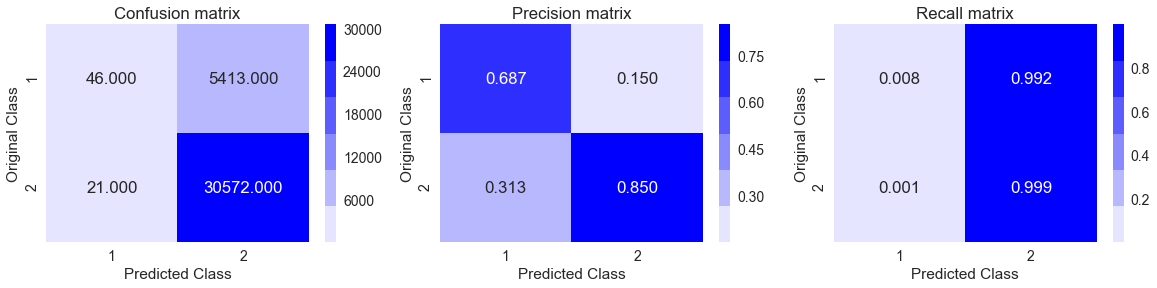

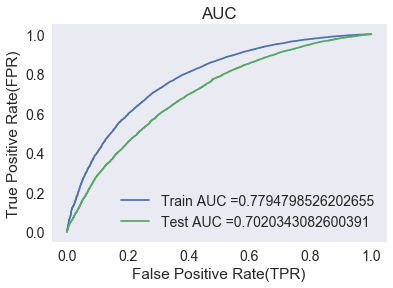

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_tr_new, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr_new, y_train)
    predict_y = sig_clf.predict_proba(X_te_new)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_tr_new, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr_new, y_train)

predict_y = sig_clf.predict_proba(X_tr_new)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te_new)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


y_train_pred = batch_predict(sig_clf, X_tr_new)    
y_test_pred = batch_predict(sig_clf, X_te_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Pretty Table

In [0]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(max depth,min samples split)", "Train AUC", "Test AUC"]

x.add_row(["BOW", "Decision Trees","(10, 500)", 0.654, 0.625])
x.add_row(["TFIDF", "Decision Trees", "(10, 500)", 0.655, 0.626])
x.add_row(["AVG W2V", "Decision Trees", "(5, 10)", 0.640, 0.60])
x.add_row(["TFIDF W2V", "Decision Trees", "(5, 10)", 0.645, 0.618])
x.add_row(["TFIDF-5k Features", "Decision Trees","(10,500)", 0.615, 0.592])
x.add_row(["TFIDF-5k Features", "Logistic Regression", "[L1 penalty, alpha = 0.0001]", 0.779, 0.702])

print(x)

+-------------------+---------------------+----------------------------------------------+-----------+----------+
|     Vectorizer    |        Model        | Hyperparameters(max depth,min samples split) | Train AUC | Test AUC |
+-------------------+---------------------+----------------------------------------------+-----------+----------+
|        BOW        |    Decision Trees   |                  (10, 500)                   |   0.654   |  0.625   |
|       TFIDF       |    Decision Trees   |                  (10, 500)                   |   0.655   |  0.626   |
|      AVG W2V      |    Decision Trees   |                   (5, 10)                    |    0.64   |   0.6    |
|     TFIDF W2V     |    Decision Trees   |                   (5, 10)                    |   0.645   |  0.618   |
| TFIDF-5k Features |    Decision Trees   |                   (10,500)                   |   0.615   |  0.592   |
| TFIDF-5k Features | Logistic Regression |         [L1 penalty, alpha = 0.0001]        